# Importing data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
data=pd.read_csv('ex1data1.txt',names=['population','profit'])
data.insert(0,'ones',1)
X=data.iloc[:,:2]
y=data.iloc[:,2:]

# visualize data

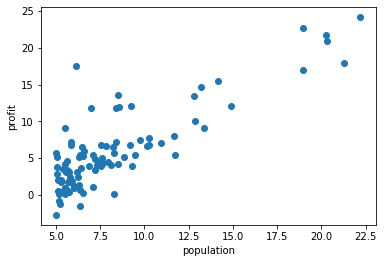

In [7]:
plt.scatter(X['population'],y)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

# Compute Cost

In [8]:
def cal_cost(X,y,features):
    m=len(X)
    temp=np.power((X*features.T)-y,2)
    return (np.sum(temp)/(2*m))

In [9]:
features=np.matrix(np.array([[0,0]]))
X=np.matrix(X)
y=np.matrix(y)
z=cal_cost(X,y,features)
features.shape

(1, 2)

# Gradient Descent

In [10]:
def gradient_descent(X,y,features,alpha,iters):
    temp=np.matrix(np.zeros(features.shape))
    m=len(X)
    para=int(temp.ravel().shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=np.matmul(X,features.T)-y
        for j in range(para):
            temp1=np.multiply(error,X[:,j])
            temp[0,j]=features[0,j]-(alpha/m)*np.sum(temp1)
        features=temp
        cost[i]=cal_cost(X,y,features)
    return features,cost
        
    

# Ploting a graph of cost vs number of iteration

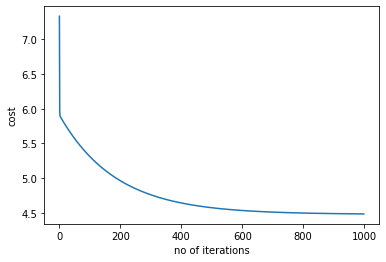

In [11]:
a=np.arange(1000)
final_features,final_cost,=gradient_descent(X,y,features,0.015,1000)
y_predicted=X*final_features.T
plt.plot(a,final_cost)
plt.xlabel('no of iterations')
plt.ylabel('cost')
plt.show()

# Graph of predicted and actual values

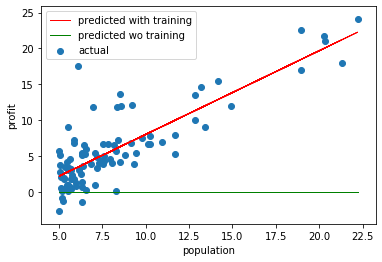

In [12]:
y_predicted=np.matmul(X,final_features.T)
y_predicted1=np.matmul(X,np.matrix(np.array([[0],[0]])))
X=pd.DataFrame(X,columns=['ones','population'])
y=pd.DataFrame(y,columns=['profit'])
plt.plot(X['population'],y_predicted,'r',linewidth=1, markersize=7,label='predicted with training')
plt.plot(X['population'],y_predicted1,'g',linewidth=1, markersize=7,label='predicted wo training')
plt.xlabel('population')
plt.ylabel('profit')
plt.scatter(X['population'],y,label='actual')
plt.legend()
plt.show()

# Linear Regression with Multiple Variables

# Data importing and Visualization

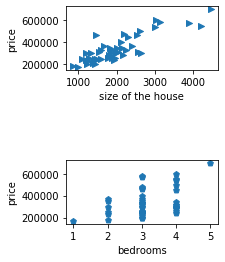

In [13]:
data1=pd.read_csv('ex1data2.txt',names=['size','bedrooms','price'])
data1.insert(0,'ones',1)
X1=pd.DataFrame(data1.iloc[:,:3])
y1=pd.DataFrame(data1.iloc[:,3:])
plt.subplot(321)
plt.scatter(X1['size'], y1['price'],  marker=">")
plt.xlabel('size of the house')
plt.ylabel('price')
plt.subplot(325)
plt.scatter(X1['bedrooms'], y1,  marker=(5, 0))
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()
X1=np.matrix(X1)
y1=np.matrix(y1)


C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kaushik\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


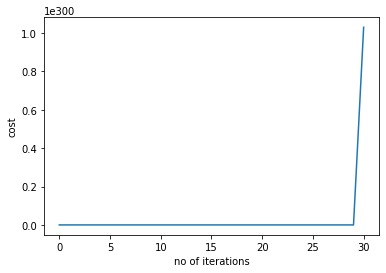

In [14]:
a=np.arange(1000)
features1=np.matrix(np.array([0,0,0]))
final_features1,final_cost1=gradient_descent(X1,y1,features1,0.01,1000)
y_predicted2=X1*final_features1.T
plt.plot(a,final_cost1)
plt.xlabel('no of iterations')
plt.ylabel('cost')
plt.show()